In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
import numpy as np



In [9]:
def process_data():
    for col in ["Gender","Age","City_Category"]:
        Unique=list(set(df[col]))
        print(Unique)
        list_1=[]
        for i in df[col]:
            for uni in Unique:
                if i==uni:
                    list_1.append(Unique.index(uni))
            
        values=np.array(list_1)
        df[col]=values
    df.to_csv("Update_training_data.csv")
    print("Done")


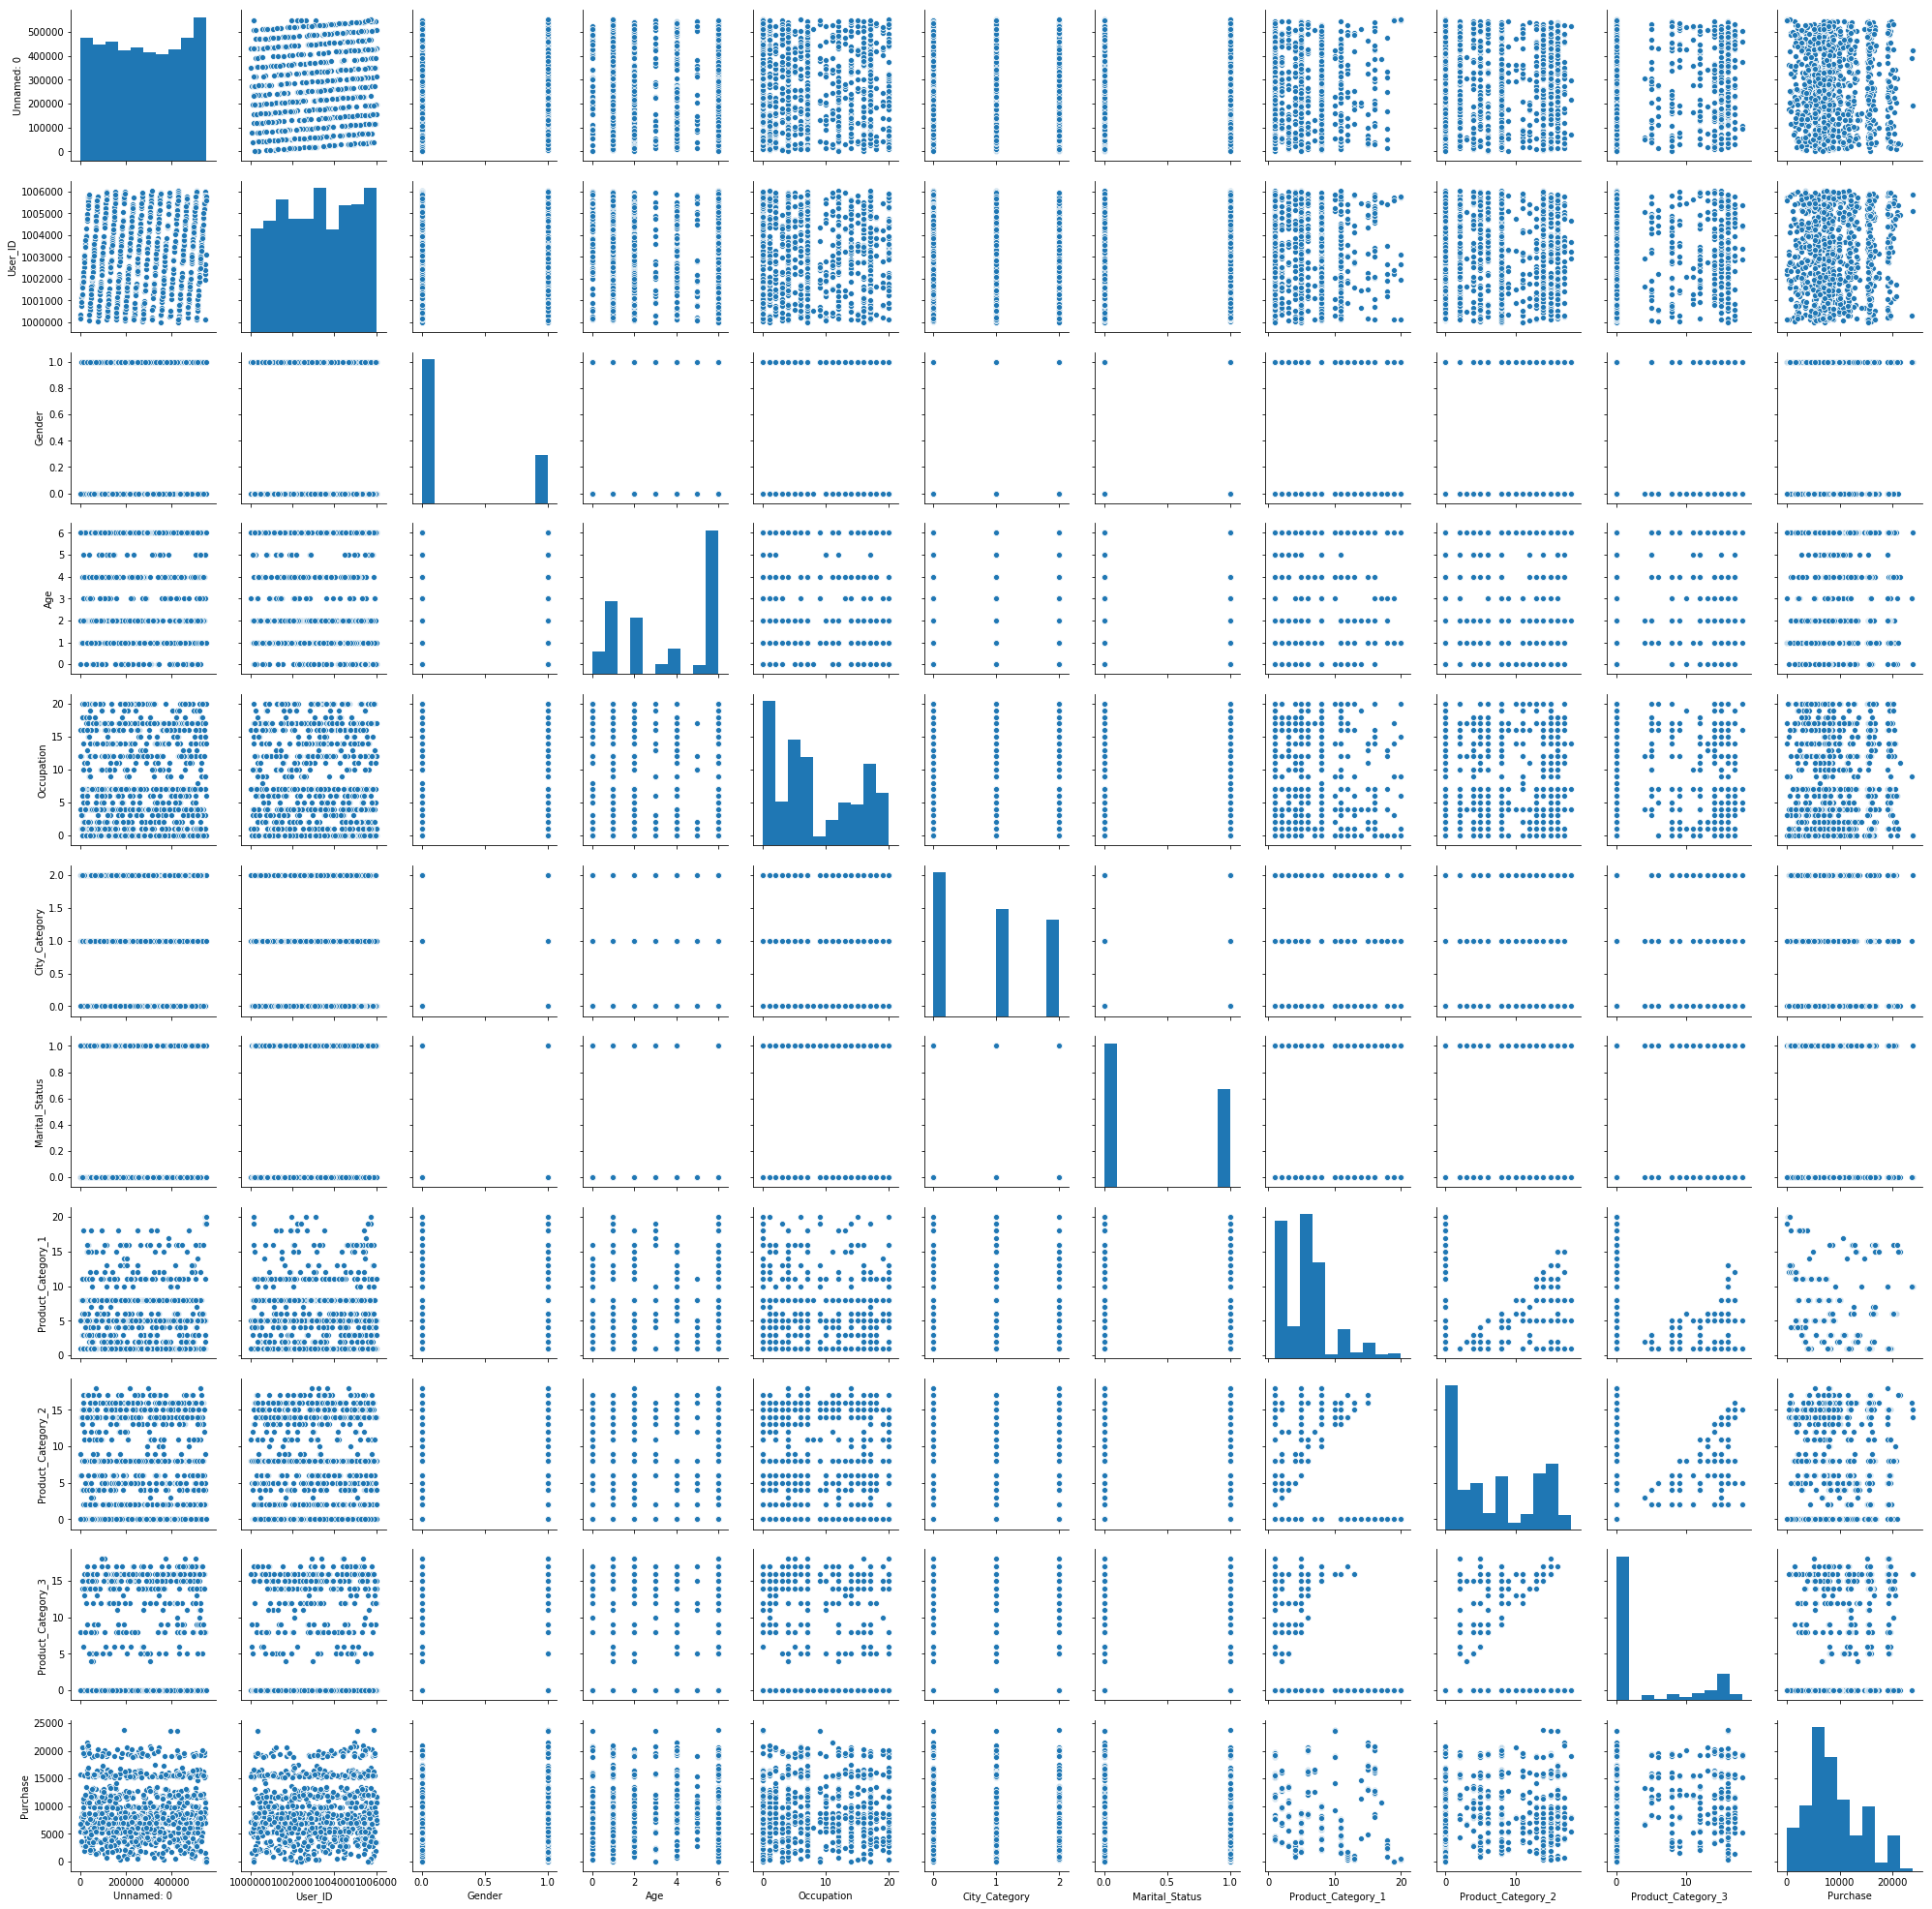

In [10]:
import seaborn as sns
df=pd.read_csv("Update_training_data.csv")
sns.pairplot(df.sample(1000))
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("Update_training_data.csv")
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].replace("4+",5)
clf=LinearRegression()
df=df.drop(["User_ID","Product_ID"],1)


X=np.array(df.drop(["Purchase"],1))
scalar=StandardScaler(copy=True, with_mean=True, with_std=True)

y=np.array(df["Purchase"])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_scaled=scalar.fit_transform(X_train)
clf.fit(X_scaled,y_train)

print("The accuracy of LinearRegression with StandardScaler normalization and no regulization is:",clf.score(scalar.transform(X_test),y_test))


C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The accuracy of LinearRegression with StandardScaler normalization and no regulization is: 0.15447786578404243


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
df=pd.read_csv("Update_training_data.csv")
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].replace("4+",5)
clf=RandomForestRegressor()
df=df.drop(["User_ID","Product_ID"],1)


X=np.array(df.drop(["Purchase"],1))
scalar=StandardScaler(copy=True, with_mean=True, with_std=True)

y=np.array(df["Purchase"])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_scaled=scalar.fit_transform(X_train)
clf.fit(X_scaled,y_train)

print("The accuracy of RandomForestRegressor is:",clf.score(scalar.transform(X_test),y_test))


C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The accuracy of RandomForestRegressor is: 0.6031040766577755


In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
df=pd.read_csv("Update_training_data.csv")
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].replace("4+",5)
clf=KNeighborsRegressor(n_jobs=-1)
df=df.drop(["User_ID","Product_ID"],1)


X=np.array(df.drop("Purchase",1))

y=np.array(df["Purchase"])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf.fit(X_train,y_train)

print("The accuracy of KNeighborsRegressor with no normalization and regulization is:",clf.score(X_test,y_test))


The accuracy of KNeighborsRegressor with no normalization and regulization is: 0.04135451293621617


In [14]:
from sklearn.linear_model import Ridge

df=pd.read_csv("Update_training_data.csv")
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].replace("4+",5)
clf=Ridge()
df=df.drop(["User_ID","Product_ID"],1)


X=np.array(df.drop("Purchase",1))

y=np.array(df["Purchase"])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf.fit(X_train,y_train)

print("The accuracy of LinearRegression with no normalization and L2 regulization is:",clf.score(X,y))


The accuracy of LinearRegression with no normalization and L2 regulization is: 0.148982216209409


In [15]:
from sklearn.linear_model import Lasso

df=pd.read_csv("Update_training_data.csv")
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].replace("4+",5)
clf=Lasso()
df=df.drop(["User_ID","Product_ID"],1)


X=np.array(df.drop("Purchase",1))

y=np.array(df["Purchase"])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf.fit(X_train,y_train)

print("The accuracy of LinearRegression with no normalization and L1 regulization is:",clf.score(X_test,y_test))

The accuracy of LinearRegression with no normalization and L1 regulization is: 0.14791010636174884


C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


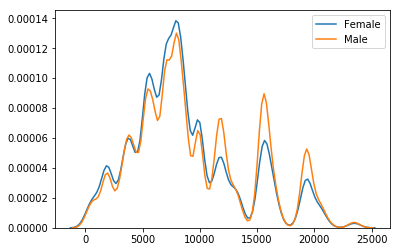

In [16]:
import pandas as pd
import seaborn as sns
df=pd.read_csv("Update_training_data.csv")

Male_data=(df["Purchase"].loc[df['Gender'] == 0])
Female_data=np.array(df["Purchase"].loc[df['Gender'] == 1])
sns.kdeplot(Female_data,label="Female")
sns.kdeplot(Male_data,label="Male")
plt.show()

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


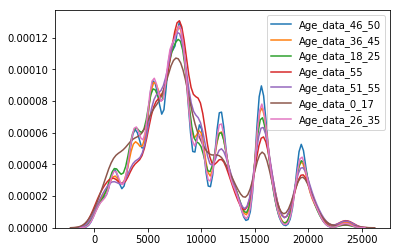

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
df=pd.read_csv("Update_training_data.csv")
Age_data_46_50=(df["Purchase"].loc[df['Gender'] == 0])
Age_data_36_45=np.array(df["Purchase"].loc[df['Age'] == 1])
Age_data_18_25=np.array(df["Purchase"].loc[df['Age'] == 2])
Age_data_55=np.array(df["Purchase"].loc[df['Age'] == 3])
Age_data_51_55=np.array(df["Purchase"].loc[df['Age'] == 4])
Age_data_0_17=np.array(df["Purchase"].loc[df['Age'] == 5])
Age_data_26_35=np.array(df["Purchase"].loc[df['Age'] == 6])
sns.kdeplot(Age_data_46_50,label="Age_data_46_50")
sns.kdeplot(Age_data_36_45,label="Age_data_36_45")
sns.kdeplot(Age_data_18_25,label="Age_data_18_25")
sns.kdeplot(Age_data_55,label="Age_data_55")
sns.kdeplot(Age_data_51_55,label="Age_data_51_55")
sns.kdeplot(Age_data_0_17,label="Age_data_0_17")
sns.kdeplot(Age_data_26_35,label="Age_data_26_35")
plt.show()




In [18]:
df_corr=df.corr()

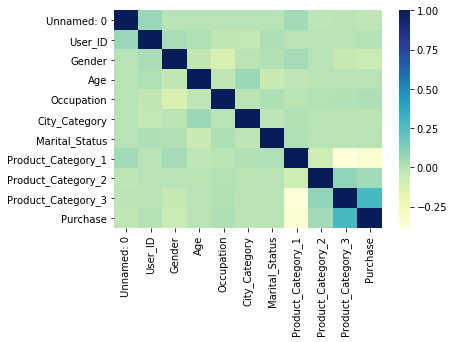

In [19]:
df_corr=df.corr()
df_corr.drop(df_corr.columns[0], axis=1)
data=df_corr.values.tolist()
sns.heatmap(data,xticklabels=df_corr.columns.tolist(),yticklabels=df_corr.columns.tolist(),cmap="YlGnBu")

The most successfull algoirthm proved to be RandomForestRegression with accuracy of above 60.
